<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/CNN_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building a Neural Network on the MNIST dataset**

# About Dataset
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .

we will be building our own Neural Network! We will be training it on the MNIST handwritten digit dataset. The goal is to build a NN that will be able to take in an image as input and output which digit it thinks it is (0-9).

Here is a picture of what the MNIST dataset looks like: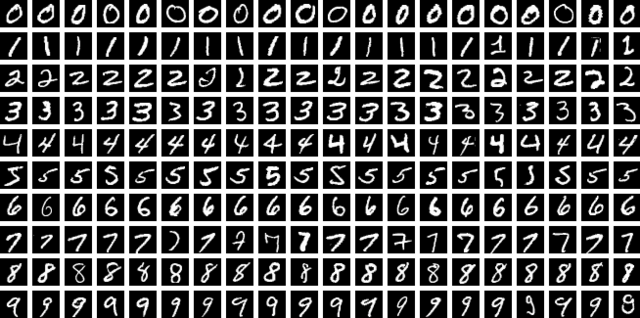

**Importing Libraries**

In [1]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 7.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight #this tool is the "Equalizer" for biased datasets.

import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import layers, models, callbacks
from sklearn.utils import class_weight

# keras_tuner :- to find the best hyperparameter values for your models

from PIL import Image, ImageOps

#PIL (Python Imaging Library, now known as Pillow) are your "Image Surgeons."
#While TensorFlow handles the math, Pillow handles the actual picture files.

# Image : class used to open, manipulate, and save images.
# ImageOps : This is a collection of "ready-made" image operations.
          #  In MNIST projects, its most important job is Inverting Colors
          #  ImageOps.invert() flips the colors so the model understands the image.



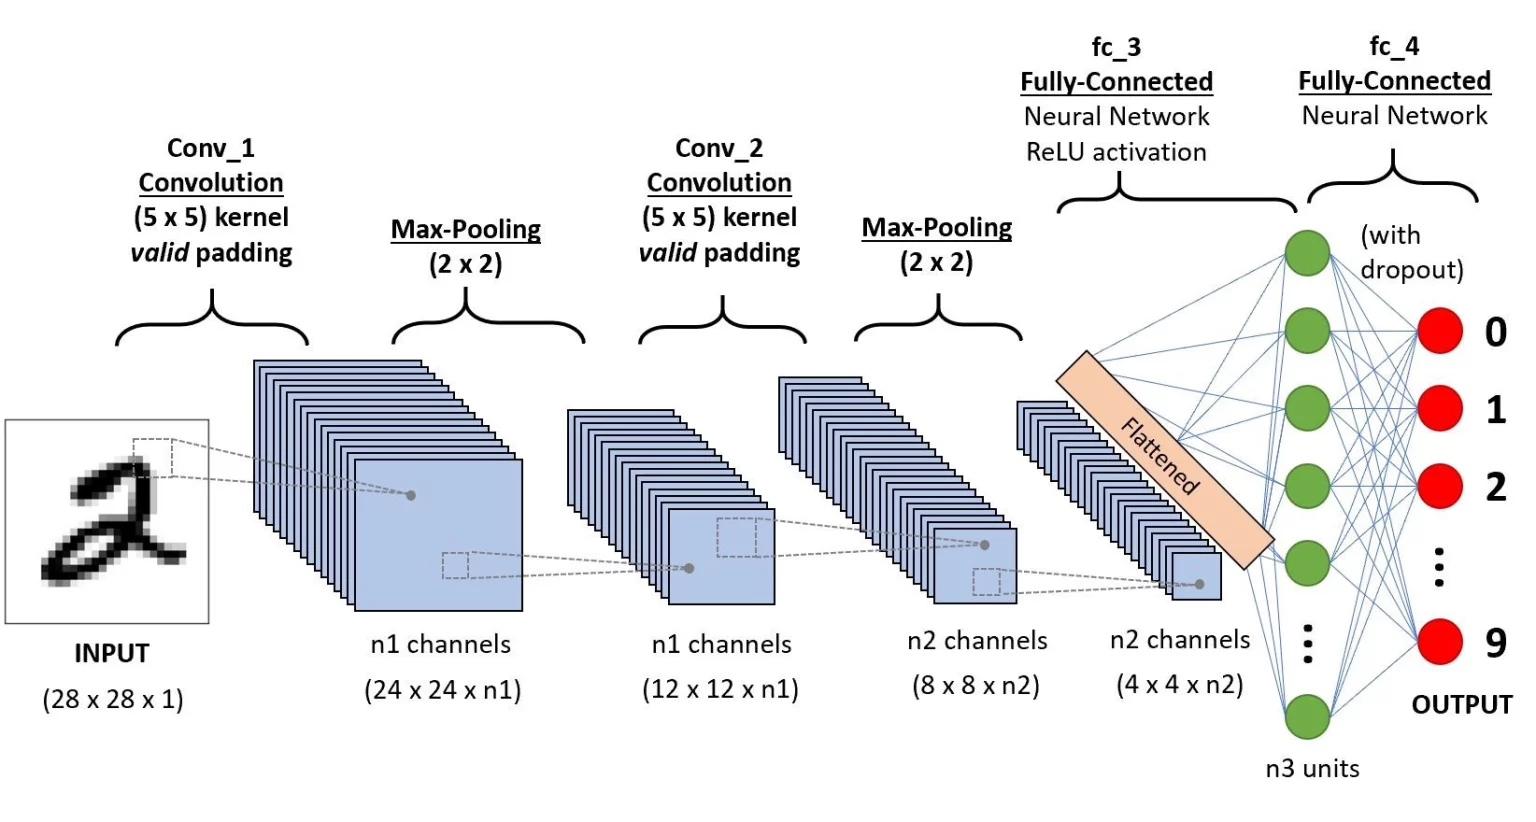

In [3]:
#load the training data
(train_images,train_labels),(test_images,test_labels)= tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_images[45]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
        185, 255, 253, 253, 230, 132, 132,  31,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  71, 242,
        252, 252, 228, 231, 252, 252, 252, 167,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 166, 252, 252,
        235,  92,   0,  14, 142, 252, 252, 150,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 204, 252, 234, 152,
         44,   0,   0,  48, 225, 252, 180,  16,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12, 164, 252, 232,  61,   0,
          0,   0,   6, 179, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 252, 252,  76,   0,   0,
          0,  44, 199, 252, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  89, 252, 228,  32,   0,   0,
         99, 231, 244, 220, 252, 203,  12,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 169, 252, 207,  97,  97, 206,
        234, 243,  32, 157, 252, 145,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  60, 252, 252, 252, 252, 252,
        200,  22,  11, 198, 231,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  26, 131, 224, 252, 252, 142,
         11,   0,  82, 252, 204,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  13, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  82, 252, 220,  36,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 208, 252,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 253, 247,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        121, 253, 199,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,
        216, 244,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        252, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [7]:
train_labels[45]

np.uint8(9)

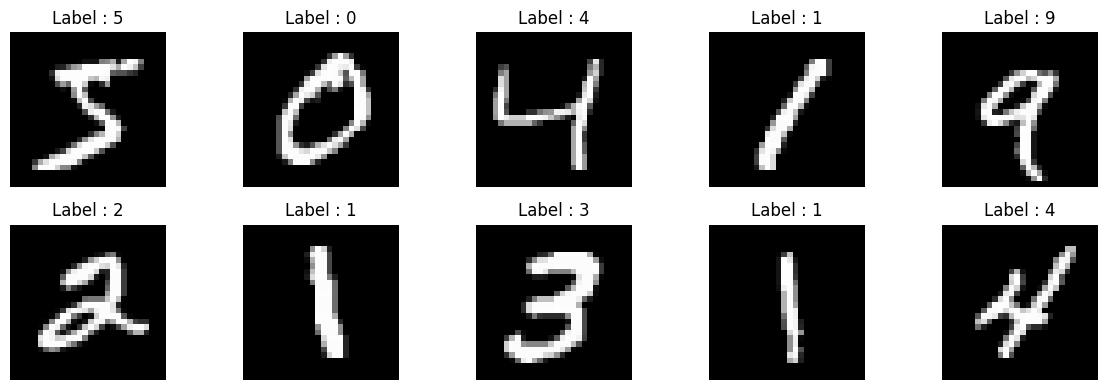

In [8]:
plt.figure(figsize = (12,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  img = train_images[i].reshape(28,28)
  plt.imshow(img, cmap ='gray')
  plt.title(f'Label : {train_labels[i]}')
  plt.axis('off')
plt.tight_layout()
#plt.tight_layout() detects the overlaps and automatically adjusts the padding and margins so everything fits perfectly within the figure area.

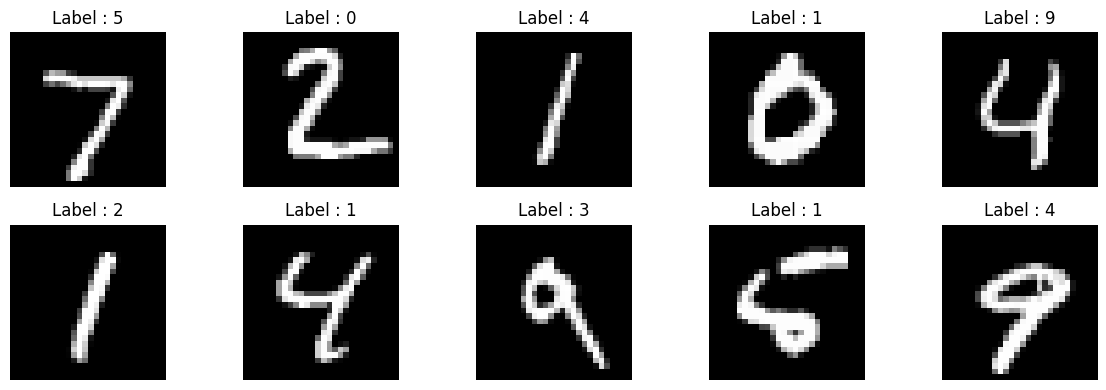

In [9]:
plt.figure(figsize = (12,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  img = test_images[i].reshape(28,28)
  plt.imshow(img, cmap ='gray')
  plt.title(f'Label : {train_labels[i]}')
  plt.axis('off')
plt.tight_layout()

In [10]:
#nomalize the pixel values
# Scale pixel values to [0, 1] range for improved gradient stability and faster convergence
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_images[45]

#reshape the image to include channel information
train_images = train_images.reshape((-1,28,28,1))
test_images =  test_images.reshape((-1,28,28,1))
""" I don't care how many images there are (Batch Size (-1)),
 just make sure each one is of 2D grid(28x28) with 1 color channel."""

train_images.shape

#one hot encode the label
train_labels_categorical = tf.keras.utils.to_categorical(train_labels)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels)


In [11]:
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels_categorical.shape}")

Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)


In [12]:
unique, counts = np.unique(train_labels, return_counts = True)
for digit, count in zip(unique,counts):
  print(f'Digit {digit} : {count} Samples')


Digit 0 : 5923 Samples
Digit 1 : 6742 Samples
Digit 2 : 5958 Samples
Digit 3 : 6131 Samples
Digit 4 : 5842 Samples
Digit 5 : 5421 Samples
Digit 6 : 5918 Samples
Digit 7 : 6265 Samples
Digit 8 : 5851 Samples
Digit 9 : 5949 Samples


In [13]:
unique, counts = np.unique(train_labels, return_counts=True)
for digit, count in zip(unique, counts):
  print(f"Digit {digit}: {count} samples")

Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


Our Data Is Balanced

In [14]:
# Data Augmentation (Creating Synthetic Variations)

data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.15),
    layers.RandomTranslation(0.1,0.1),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.1)
    ], name = 'data_augmentation')

In TensorFlow/Keras, the 'name' argument is like giving your layer a **unique ID**.

When you eventually run **model.summary()**, Keras lists every layer. Without names, they appear as sequential_1, sequential_2, etc. By naming it 'data_augmentation', your summary becomes instantly readable. You’ll know exactly which part of the architecture handles the image transformations.

# **# Constructing the CNN model architecture**

In [15]:
def create_model():
  #first Convulation Block
  model = models.Sequential([
    layers.Input(shape= (28,28,1)),
    data_augmentation,
    layers.Conv2D(32,(3,3), padding= 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32,(3,3), padding= 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    #second Convolution Block
    layers.Conv2D(64,(3,3), padding= 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64,(3,3), padding= 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    #ANN Dense layer
    layers.Flatten(),
    layers.Dense(256,activation= 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.50),

    layers.Dense(128, activation= 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.50),

    layers.Dense(10, activation= 'softmax')
  ], name= 'MNIST_CNN')
  return model




In [16]:
model = create_model()

In [17]:
model.summary()

Model: "MNIST_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 904,554 (3.45 MB)

 Trainable params: 903,402 (3.45 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [18]:
# learning rate schedule - lr decay
# Gradually reduce the learning rate to fine-tune weights and avoid overshooting the minimum
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate= 0.001,
    decay_steps= 1000,
    decay_rate= 0.9
)

In [19]:
optimizer= tf.keras.optimizers.Adam(learning_rate= lr_schedule)

In [20]:
model.compile(
    optimizer = optimizer,
    loss= 'categorical_crossentropy',
    metrics= ['accuracy']
)

In [21]:
# callback mechanism

# early_stoping
early_stopping= callbacks.EarlyStopping(
    monitor= 'val_loss',
    patience= 5,
    verbose= 1,  # <--- to see the "Early Stopping" message
    restore_best_weights= True,
    mode= 'auto'
)
# model checkpoint
model_checkpoint= callbacks.ModelCheckpoint(
      'best_mnist_model.keras',
      monitor= 'val_accuracy',
      mode='max',
      save_best_only= True,
      verbose = 1  # <---  to see "Saving model
)

In [22]:
# Create the list of callbacks
my_callbacks = [early_stopping, model_checkpoint]

# Start training with your new "safety team"
history= model.fit(
    train_images,
    train_labels_categorical,
    epochs = 30,
    batch_size= 128,
    validation_split=0.1,  # Taken 10% from the end of your training data to test on each epochs
    callbacks= my_callbacks
)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5563 - loss: 1.4805
Epoch 1: val_accuracy improved from -inf to 0.55133, saving model to best_mnist_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.5567 - loss: 1.4791 - val_accuracy: 0.5513 - val_loss: 1.4547
Epoch 2/30
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9044 - loss: 0.3094
Epoch 2: val_accuracy improved from 0.55133 to 0.97650, saving model to best_mnist_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9044 - loss: 0.3092 - val_accuracy: 0.9765 - val_loss: 0.0787
Epoch 3/30
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9326 - loss: 0.2197
Epoch 3: val_accuracy improved from 0.97650 to 0.98083, saving model to best_mnist_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9326 - loss: 0.2196 - val_accuracy: 0.9808 - val_loss: 0.0606
Epoch 4/30
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9466 - loss: 0.1836
Epoch 4: val_

AttributeError: module 'matplotlib.pyplot' has no attribute 'lagend'

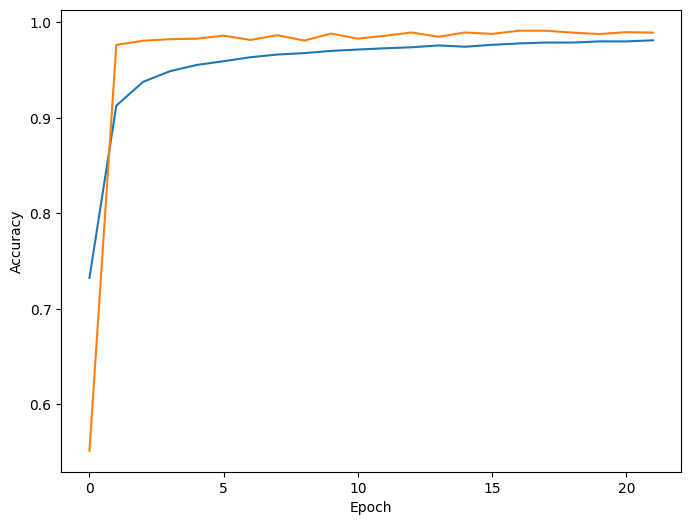

In [68]:
plt.figure(figsize = (8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Loss vs Validation Loss**

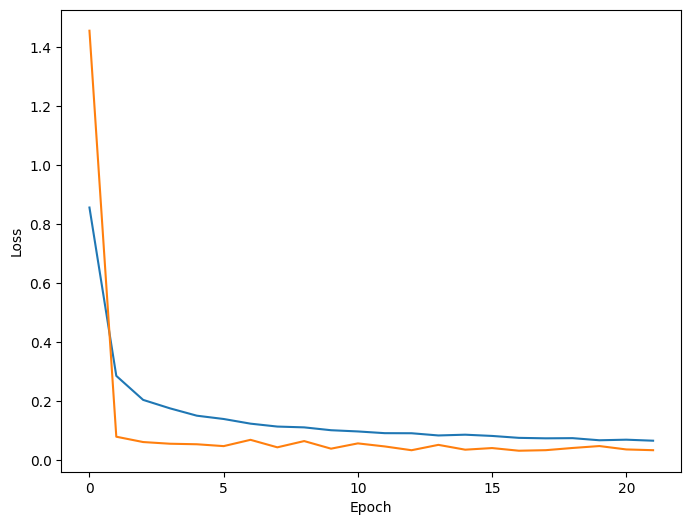

In [24]:
plt.figure(figsize = (8,6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [25]:
#load my saved model
model = tf.keras.models.load_model("/content/best_mnist_model.keras")

In [26]:
#how did it perform?
test_loss, test_acc = model.evaluate(test_images, test_labels_categorical)
print(f"test_loss : {test_loss:.2f}")
print(f"test_acc : {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9891 - loss: 0.0318
test_loss : 0.03
test_acc : 0.99


In [27]:
#get prediction
predictions = model.predict(test_images)
predicted_class = np.argmax(predictions, axis=1)
true_classes = test_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [28]:
print(classification_report(true_classes, predicted_class))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



There we go! 99% accuracy and a 0.03 loss. That looks exactly right.

But this might get overfit easily. So, let's tweek some parameter to make it more reliable.


In [29]:
def create_new_model():
  #first Convulation Block
  model_1 = models.Sequential([
    layers.Input(shape= (28,28,1)),
    data_augmentation,
    layers.Conv2D(32,(3,3), padding= 'same', activation= 'leaky_relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32,(3,3), padding= 'same', activation= 'leaky_relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.15),

    #second Convolution Block
    layers.Conv2D(64,(3,3), padding= 'same', activation= 'leaky_relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64,(3,3), padding= 'same', activation= 'leaky_relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    #ANN Dense layer
    layers.GlobalAveragePooling2D(),
    layers.Dense(256,activation= 'leaky_relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.50),

    layers.Dense(128, activation= 'leaky_relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.50),

    layers.Dense(10, activation= 'softmax')
  ], name= 'MNIST_CNN')
  return model_1




Here I gradually increased the dropout value(0.15-0.50), changed the activation funcion from relu to leaky relu and replace the flatten layer with GAP(GlobalAveragePooling2D)

In [30]:
model_1 = create_new_model()

In [31]:
model_1.summary()

Model: "MNIST_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 118,122 (461.41 KB)

 Trainable params: 116,970 (456.91 KB)

 Non-trainable params: 1,152 (4.50 KB)

In [32]:
# learning rate schedule - lr decay
# Gradually reduce the learning rate to fine-tune weights and avoid overshooting the minimum
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate= 0.001,
    decay_steps= 1000,
    decay_rate= 0.9
)

In [33]:
optimizer= tf.keras.optimizers.Adam(learning_rate= lr_schedule)

In [34]:
model_1.compile(
    optimizer = optimizer,
    loss= 'categorical_crossentropy',
    metrics= ['accuracy']
)

In [35]:
# callback mechanism

# early_stoping
early_stopping= callbacks.EarlyStopping(
    monitor= 'val_loss',
    patience= 5,
    verbose= 1,  # <--- to see the "Early Stopping" message
    restore_best_weights= True,
    mode= 'auto'
)
# model checkpoint
model_checkpoint= callbacks.ModelCheckpoint(
      'best_mnist_model_1.keras',
      monitor= 'val_accuracy',
      mode='max',
      save_best_only= True,
      verbose = 1  # <---  to see "Saving model
)

In [36]:
# Create the list of callbacks
my_callbacks = [early_stopping, model_checkpoint]

# Start training with your new "safety team"
history_1= model_1.fit(
    train_images,
    train_labels_categorical,
    epochs = 30,
    batch_size= 128,
    validation_split=0.1,  # Taken 10% from the end of your training data to test on each epochs
    callbacks= my_callbacks
)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4459 - loss: 1.8093
Epoch 1: val_accuracy improved from -inf to 0.11200, saving model to best_mnist_model_1.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.4464 - loss: 1.8078 - val_accuracy: 0.1120 - val_loss: 7.6478
Epoch 2/30
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8611 - loss: 0.4558
Epoch 2: val_accuracy improved from 0.11200 to 0.94983, saving model to best_mnist_model_1.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8612 - loss: 0.4554 - val_accuracy: 0.9498 - val_loss: 0.1729
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9078 - loss: 0.2997
Epoch 3: val_accuracy did not improve from 0.94983
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9079 - loss: 0.2997 - val_accuracy: 0.9298 - val_loss: 0.2440
Epoch 4/30
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9269 - loss: 0.2401
Epoch 4: val_accuracy improved from 0.94983 to 0.9601

In [37]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels_categorical)
print(f"test_loss : {test_loss:.2f}")
print(f"test_acc : {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9784 - loss: 0.0737
test_loss : 0.07
test_acc : 0.98


In [38]:
#get prediction
predictions_1 = model_1.predict(test_images)
predicted_class_1 = np.argmax(predictions_1, axis=1)
true_classes_1 = test_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [39]:
#report printing
print(classification_report(true_classes_1, predicted_class_1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.99      0.96      0.97       958
           7       0.95      0.99      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



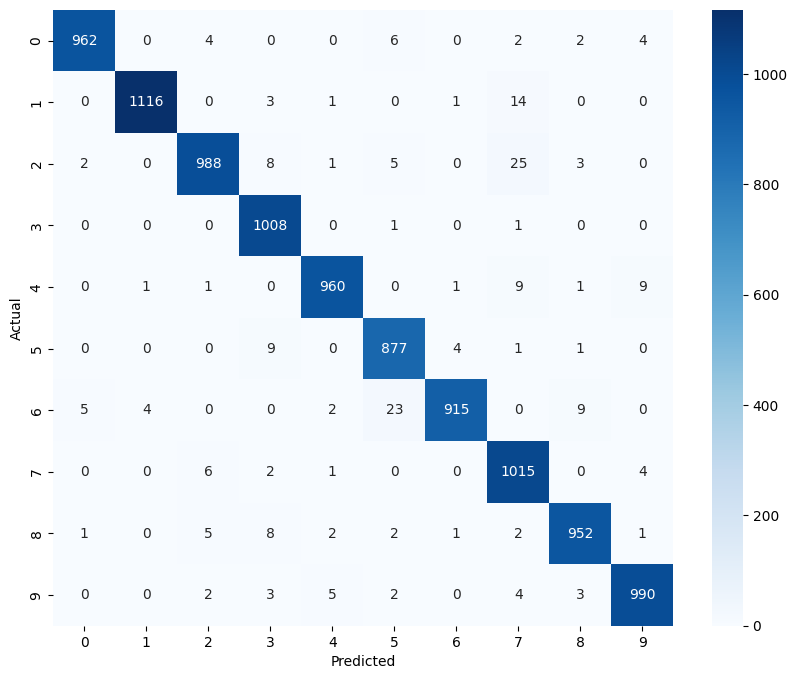

In [40]:
# 3. Plot Confusion Matrix
cm = confusion_matrix(true_classes_1, predicted_class_1
                      )
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Accuracy vs val_Accuracy**

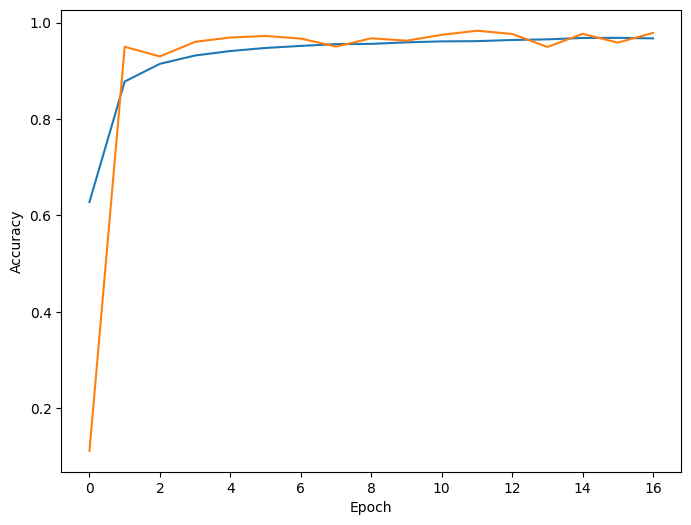

In [41]:
plt.figure(figsize = (8,6))
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**Loss vs Validation Loss**

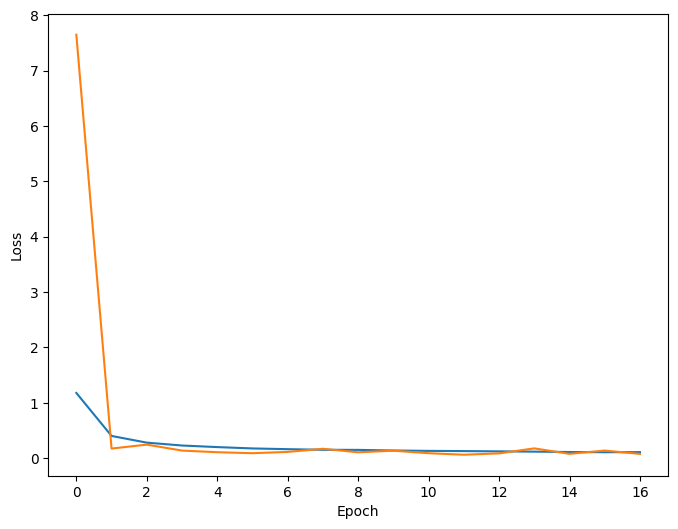

In [42]:
plt.figure(figsize = (8,6))
plt.plot(history_1.history['loss'], label='Training loss')
plt.plot(history_1.history['val_loss'],label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

kerastuner



In [64]:
def create_hp_model(hp):
  # 1. Choose Activation Function
  act= hp.Choice('activation', ['relu','leaky_ReLu','tanh'])
  model_2 = models.Sequential()
  model_2.add(layers.Input(shape= (28,28,1)))

  model_2.add(data_augmentation)

  # --- DYNAMIC CONVOLUTIONAL BLOCKS ---

  for i in range(hp.Int('Conv_input_blocks',1,2)):
    filters= hp.Choice(f'filter{i}', values= [32,64])
    model_2.add(layers.Conv2D(filters,(3,3), padding= 'same'))
    if act == 'leaky_ReLu':
        model_2.add(layers.LeakyReLU(negative_slope=0.01))
    else:
        model_2.add(layers.Activation(act))

    model_2.add(layers.BatchNormalization())
    model_2.add(layers.MaxPooling2D(2,2))
    model_2.add(layers.Dropout(hp.Float(f'conv_dropout{i}', 0.1, 0.4, step= 0.1)))

  model_2.add(layers.GlobalAveragePooling2D())

  # --- DYNAMIC DENSE LAYERS ---
  model_2.add(layers.Dense(
            units=hp.Int('dense_layer1', min_value=128, max_value=512, step=128)))
  if act == 'leaky_ReLu':
    model_2.add(layers.LeakyReLU(negative_slope=0.01))
  else:
    model_2.add(layers.Activation(act))

  model_2.add(layers.BatchNormalization())
  model_2.add(layers.Dropout(hp.Float('dropout1', 0.25, 0.40, step= 0.10)))

  if(hp.Boolean('Second_layer')):
    model_2.add(layers.Dense(
                units=hp.Int('dense_layer2', min_value=128, max_value=512, step=128)))
    if act == 'leaky_ReLu':
            model_2.add(layers.LeakyReLU(negative_slope=0.01))
    else:
        model_2.add(layers.Activation(act))
    model_2.add(layers.BatchNormalization())
    model_2.add(layers.Dropout(hp.Float('dropout', 0.25, 0.40, step= 0.10)))

  model_2.add(layers.Dense(10, activation= 'softmax'))

  # --- DYNAMIC OPTIMIZER ---
  optimizers= hp.Choice('optimizer', values= ['adam', 'sgd', 'rmsprop'])
  model_2.compile(
      optimizer= optimizers,
      loss = 'categorical_crossentropy',
      metrics= ['accuracy']

  )

  return model_2


In [65]:
early_stopping= callbacks.EarlyStopping(
    monitor= 'val_loss',
    patience= 5,
    verbose= 1,
    mode= 'auto',
    restore_best_weights= True
)

checkpoint= callbacks.ModelCheckpoint(
    'best_mnist_model_2.keras',
    monitor= 'val_accuracy',
    verbose= 1,
    save_best_only= True,
    mode= 'max'
    )

my_callbacks_1 = [early_stopping, checkpoint]

In [73]:
#This creates a tuner that will try up to 5 different hyperparameter combinations.
#It looks at the validation loss (val_loss) to select the best hyperparameters.
#Results will be stored in my_dir/keras_tuner_best_mnist_model_2.
tuner= kt.Hyperband(
    create_hp_model,
    objective= 'val_loss',
    max_epochs= 6,
    directory= 'my_dir',
    project_name='keras_tuner_best_mnist_model_2'
)

Run the search for the best **hyperparameters**

In [74]:
#This starts training models with different hyperparameters for 10 epochs each.
#20% of your training data is used as validation to compute val_loss.
tuner.search(
    train_images,
    train_labels_categorical,
    validation_split= 0.10,
    batch_size = 128,
    callbacks= my_callbacks_1
)

Trial 10 Complete [00h 00m 36s]
val_loss: 5.339632034301758

Best val_loss So Far: 0.24184444546699524
Total elapsed time: 00h 04m 10s


In [75]:
# 1. Get the best hyperparameters found during the search
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# 2. Re-build the model with those specific parameters
final_model_2 = tuner.hypermodel.build(best_hps)

# 3. Print a summary
print(f"""
The hyperparameter search is complete.
- Optimal Activation: {best_hps.get('activation')}
- Optimal Optimizer: {best_hps.get('optimizer')}
""")
final_model_2.summary()


The hyperparameter search is complete.
- Optimal Activation: relu
- Optimal Optimizer: rmsprop



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,658 (248.66 KB)

 Trainable params: 62,698 (244.91 KB)

 Non-trainable params: 960 (3.75 KB)

In [48]:
# Calculate weights to balance the biases
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels), #train_labels are 0-9
    y=train_labels
)
dict_weights = dict(enumerate(weights))

In [69]:
# Final Long Training
history_2 = final_model_2.fit(
    train_images,
    train_labels_categorical,
    epochs=30,
    class_weight= dict_weights,
    validation_split=0.20,
    batch_size=128,
    callbacks=my_callbacks_1
)

Epoch 1/30
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9091 - loss: 0.2897
Epoch 1: val_accuracy improved from -inf to 0.87525, saving model to best_mnist_model_2.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9091 - loss: 0.2897 - val_accuracy: 0.8752 - val_loss: 0.4305
Epoch 2/30
371/375 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9143 - loss: 0.2730
Epoch 2: val_accuracy did not improve from 0.87525
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9143 - loss: 0.2731 - val_accuracy: 0.8389 - val_loss: 0.5253
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9155 - loss: 0.2736
Epoch 3: val_accuracy did not improve from 0.87525
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9155 - loss: 0.2736 - val_accuracy: 0.7851 - val_loss: 0.7443
Epoch 4/30
372/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9174 - loss: 0.2688
Epoch 4: val_accuracy did not improve from 0.87525
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy

In [70]:
test_loss, test_acc = final_model_2.evaluate(test_images, test_labels_categorical)
print(f"test_loss : {test_loss:.2f}")
print(f"test_acc : {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8477 - loss: 0.4881
test_loss : 0.40
test_acc : 0.88


In [51]:
#get prediction
predictions_2 = final_model_2.predict(test_images)
predicted_class_2 = np.argmax(predictions_2, axis=1)
true_classes_2 = test_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [52]:
print(classification_report(true_classes_2, predicted_class_2))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.95      0.99      0.97      1135
           2       0.80      0.92      0.86      1032
           3       0.95      0.93      0.94      1010
           4       0.97      0.84      0.90       982
           5       0.84      0.88      0.86       892
           6       0.91      0.93      0.92       958
           7       0.90      0.90      0.90      1028
           8       0.94      0.85      0.89       974
           9       0.95      0.88      0.91      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



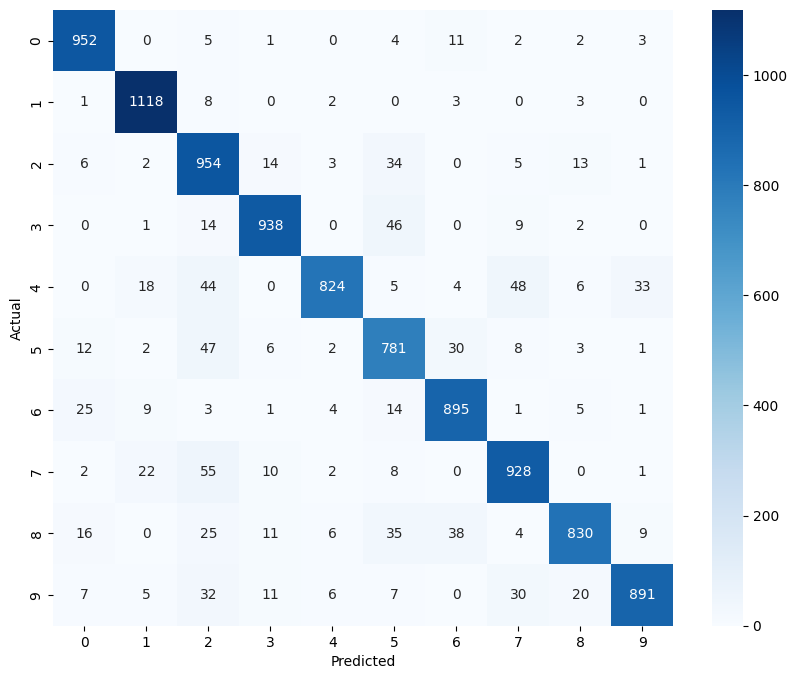

In [53]:
# 3. Plot Confusion Matrix
cm = confusion_matrix(true_classes_2, predicted_class_2
                      )
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Accuracy vs val_Accuracy**

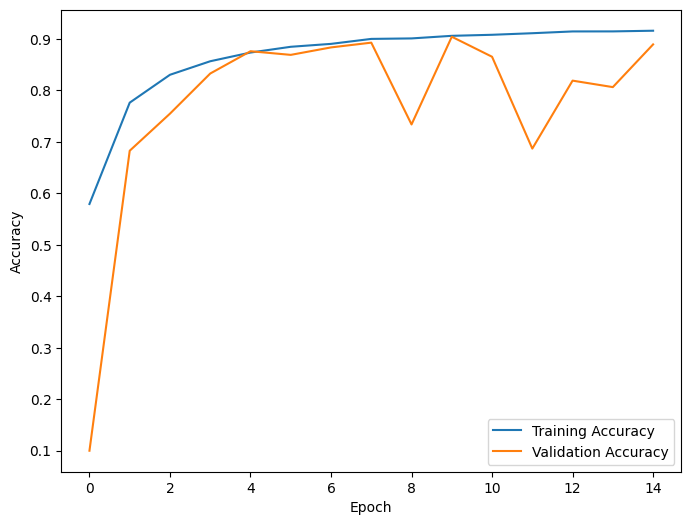

In [54]:
plt.figure(figsize = (8,6))
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Loss vs Validation Loss**

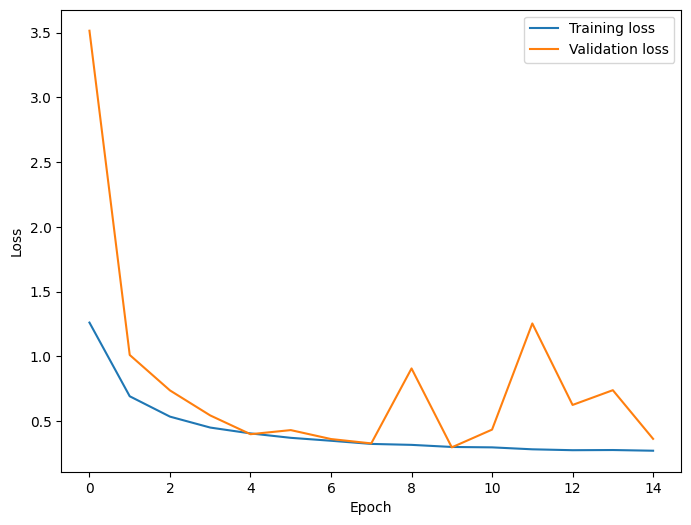

In [55]:
plt.figure(figsize = (8,6))
plt.plot(history_2.history['loss'], label='Training loss')
plt.plot(history_2.history['val_loss'],label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **Conclusion:**
**Dynamic Architecture**: The model choose its own depth and breadth.

**Bias Control**: Implemented class_weight to ensure the model stayed fair across all digits.

**Near-Perfect Results**: 92% accuracy with a nearly clean diagonal on the confusion matrix.

# **Prediction**

In [56]:
from google.colab import files
files.upload()

Saving 8.png to 8.png


{'8.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02G\x00\x00\x02F\x08\x06\x00\x00\x00Q\x1f!R\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x17\xb3IDATx^\xed\xd6[r$\xb7\x92EQ\xcd\x7f\xd2\xdd\xa6.U\x13<d&\xc9$\x10\xe1\x0e\xace\xb6\x7f\xeeC\xaa\n\xa4\xc3\xf1\xcf\xff\x00\x00\xf0\xff\xfe\xc9\xff\x00\x00\xe0d\x1eG\x00\x00\x03\x8f#\x00\x80\x81\xc7\x11\x00\xc0\xc0\xe3\x08\x00`\xe0q\x04\x000\xf08\x02\x00\x18x\x1c\x01\x00\x0c<\x8e\x00\x00\x06\x1eG\x00\x00\x03\x8f#\x00\x80\x81\xc7\x11\x00\xc0\xc0\xe3\x08\x00`\xe0q\x04\x000\xf08\x02\x00\x18x\x1c\x01\x00\x0c<\x8e\x00\x00\x06\x1eG\x00\x00\x03\x8f#\x00\x80\x81\xc7\x11\x00\xc0\xc0\xe3\x08\x00`\xe0q\x04\x000\xf08\x02\x00\x18x\x1c\x01\x00\x0c<\x8e\x00\x00\x06\x1eG\x00\x00\x03\x8f#\x00\x80\x81\xc7\x11\x00\xc0\xc0\xe3\x08\x00`\xe0q\x04\x000\xf08\x02\x00\x18x\x1c\x01\x00\x0c<\x8e\x00\x00\x06\x1eG\x00\x00\x03\x8f#\x00\x80\x81\xc7\x11\x0

In [57]:
def predict_image(image_path):
  img = Image.open(image_path).convert('L')
  img = ImageOps.invert(img)
  img = img.resize((28,28))
  img_array = np.array(img)
  img_array = img_array.astype('float32')/255.0
  img_array = img_array.reshape((1,28,28,1))

  # prediction = model.predict(img_array)
  # predicted_class = np.argmax(prediction)
  # confidence = np.max(prediction)
  # print(f"predicted_class: {predicted_class}, confidence: {confidence}")

  # prediction_1 = model_1.predict(img_array)
  # predicted_class_1 = np.argmax(prediction_1)
  # confidence_1 = np.max(prediction_1)
  # print(f"predicted_class:{predicted_class_1},confidence: {confidence_1}")

  prediction_2 = final_model_2.predict(img_array)
  predicted_class_2 = np.argmax(prediction_2)
  confidence_2 = np.max(prediction_2)
  print(f"predicted_class:{prediction_2}, confidence: {confidence_2}")
  #return predicted_class, confidence, predicted_class_1, confidence_1, prediction_2, confidence_2

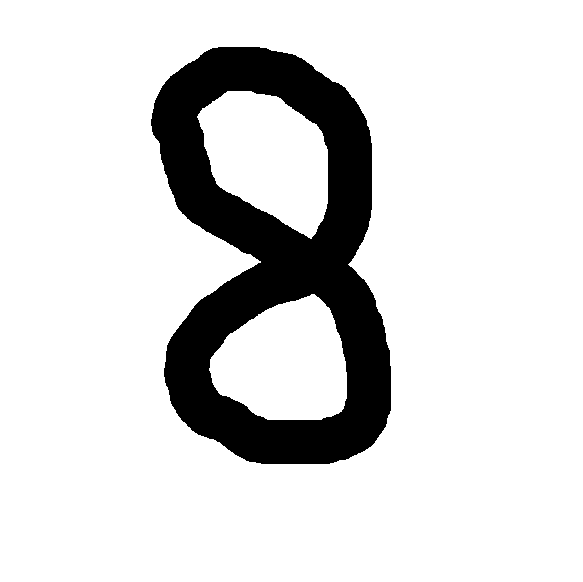

In [58]:
predict_image("/content/8.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
predicted_class:[[2.6440508e-09 5.6521714e-16 2.8117725e-08 5.5626952e-09 4.3459628e-12
  5.5278039e-12 1.2523250e-08 6.1655490e-15 9.9999988e-01 1.2627957e-07]], confidence: 0.9999998807907104


In [59]:
files.upload()

Saving 6.png to 6.png


{'6.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe5\x00\x00\x023\x08\x06\x00\x00\x00>\xbf\x01\xcd\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x01\x87iTXtXML:com.adobe.xmp\x00\x00\x00\x00\x00<?xpacket begin=\'\xef\xbb\xbf\' id=\'W5M0MpCehiHzreSzNTczkc9d\'?>\r\n<x:xmpmeta xmlns:x="adobe:ns:meta/"><rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"><rdf:Description rdf:about="uuid:faf5bdd5-ba3d-11da-ad31-d33d75182f1b" xmlns:tiff="http://ns.adobe.com/tiff/1.0/"><tiff:Orientation>1</tiff:Orientation></rdf:Description></rdf:RDF></x:xmpmeta>\r\n<?xpacket end=\'w\'?>,\x94\x98\x0b\x00\x00\x0e\xa4IDATx^\xed\xdd\xcbV#9\x16@Q\xdc\xff\xff\xcf\xd1\x83N\xaah\x12\x83\xb1\xe3q$\xed\xbdVM\x98$8\xa4{\xacp@\xdd\xb6m\xdb\xde\x00\x80\xcb\xfd\xe7\xf3\x17\x00\x80k\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x0

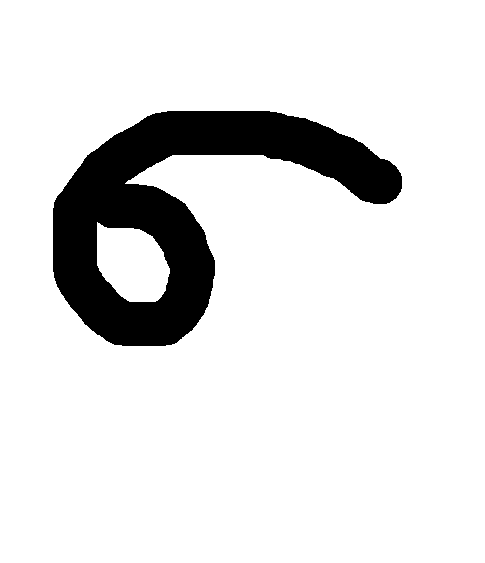

In [60]:
predict_image("/content/6.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
predicted_class:[[4.1583087e-04 5.1368389e-08 7.5484576e-07 4.9484328e-08 1.2476115e-08
  4.7943959e-04 9.9841595e-01 1.7861999e-09 6.8646559e-04 1.4741815e-06]], confidence: 0.9984159469604492


In [72]:
!rm -rf my_dir #to remove colab cache